# Drawing for vector fields

For vector fields, there are special drawings. Here we explain how to extract information from these drawings

In [40]:
from diffractio import degrees, mm, nm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_sources_XY import Vector_source_XY

from diffractio.utils_drawing import concatenate_drawings, draw_several_fields

In [41]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,6]
rcParams['figure.dpi']=250

# Definition of a vector wave

In [42]:
length = 500 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-200*um, 200*um, 512)
y0 = np.linspace(-200*um, 200*um, 512)

u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(A=1, r0=(0,0), w0=100*um, z0=0)

EM = Vector_source_XY(x0, y0, wavelength)
EM.azimuthal_wave(u=u0, r0=(0,0), radius=(200,200))
EM.VRS(z=10*mm, new_field=False)
EM.normalize()

Ex,Ey,_=EM.get()

EM.reduce_matrix=''

## Draw intensity

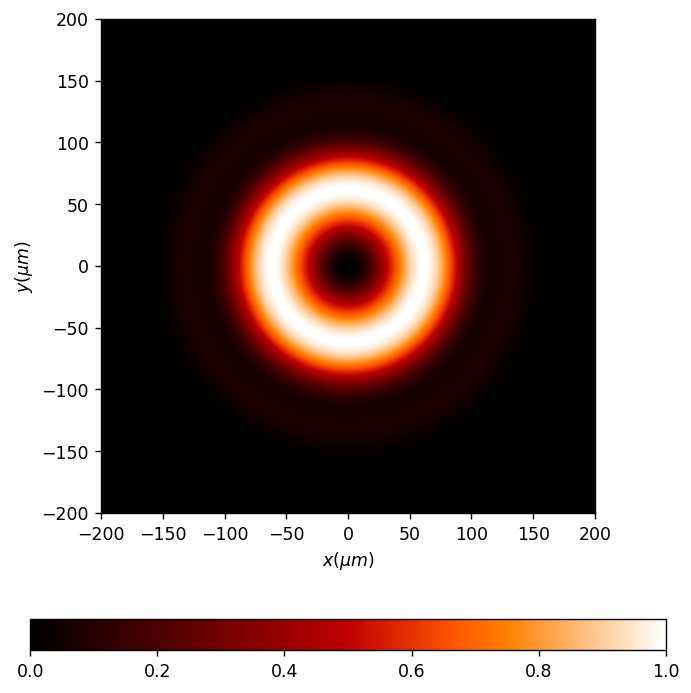

In [43]:
#EM.__draw_intensity__();
EM.draw(kind='intensity');

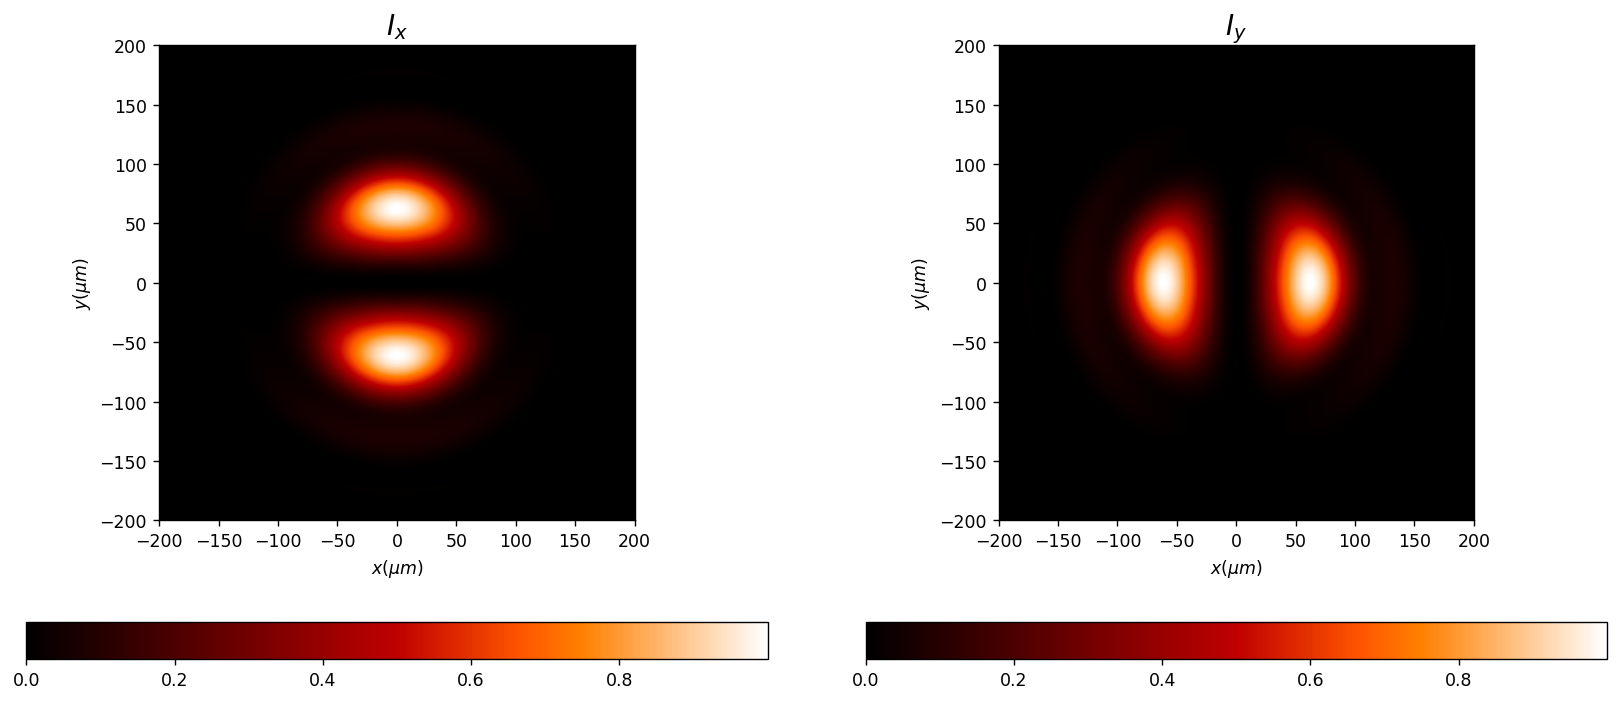

In [44]:
#EM.__draw_intensities__();
EM.draw(kind='intensities');

## Draw phase

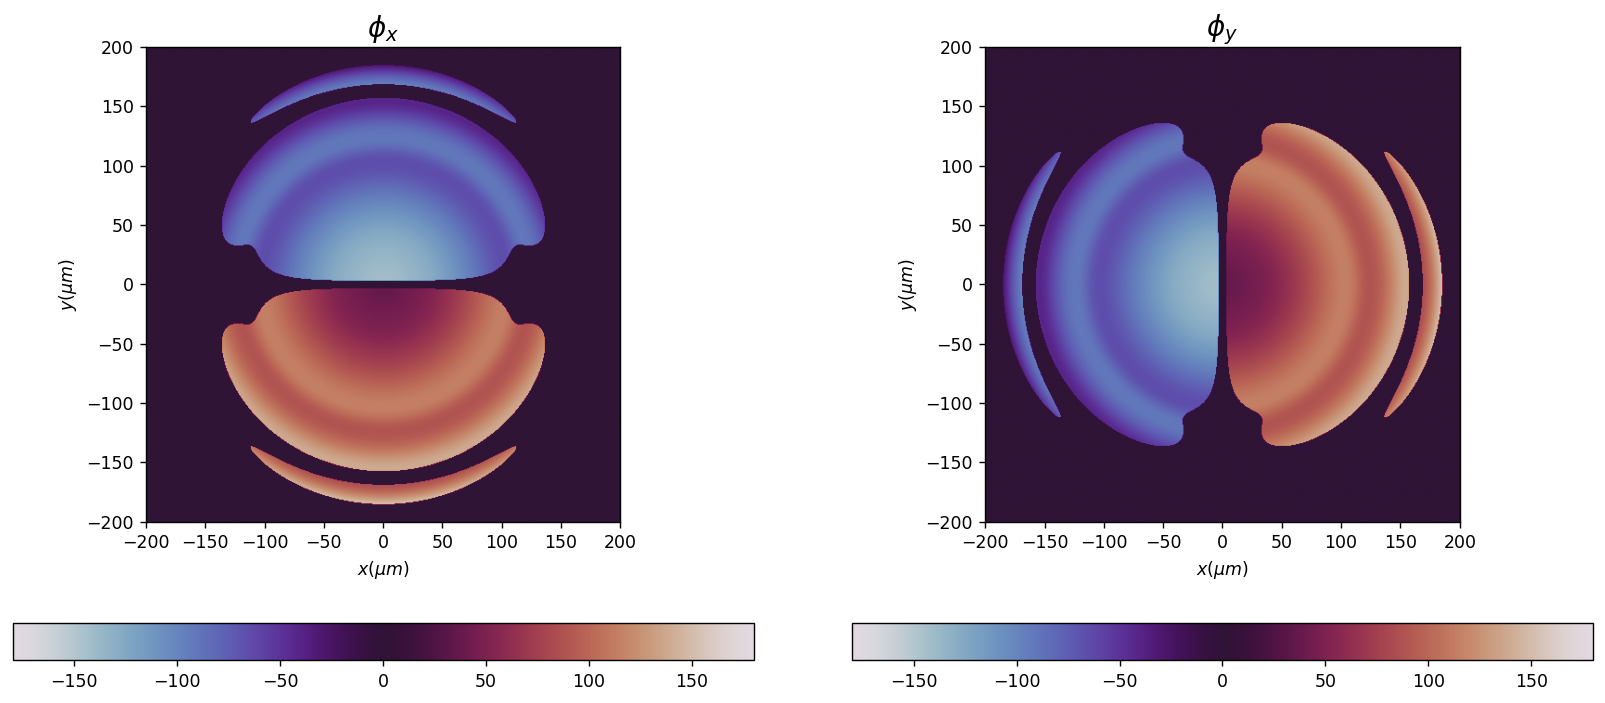

In [45]:
#EM.__draw_phases__();
EM.draw(kind='phases');

## draw field

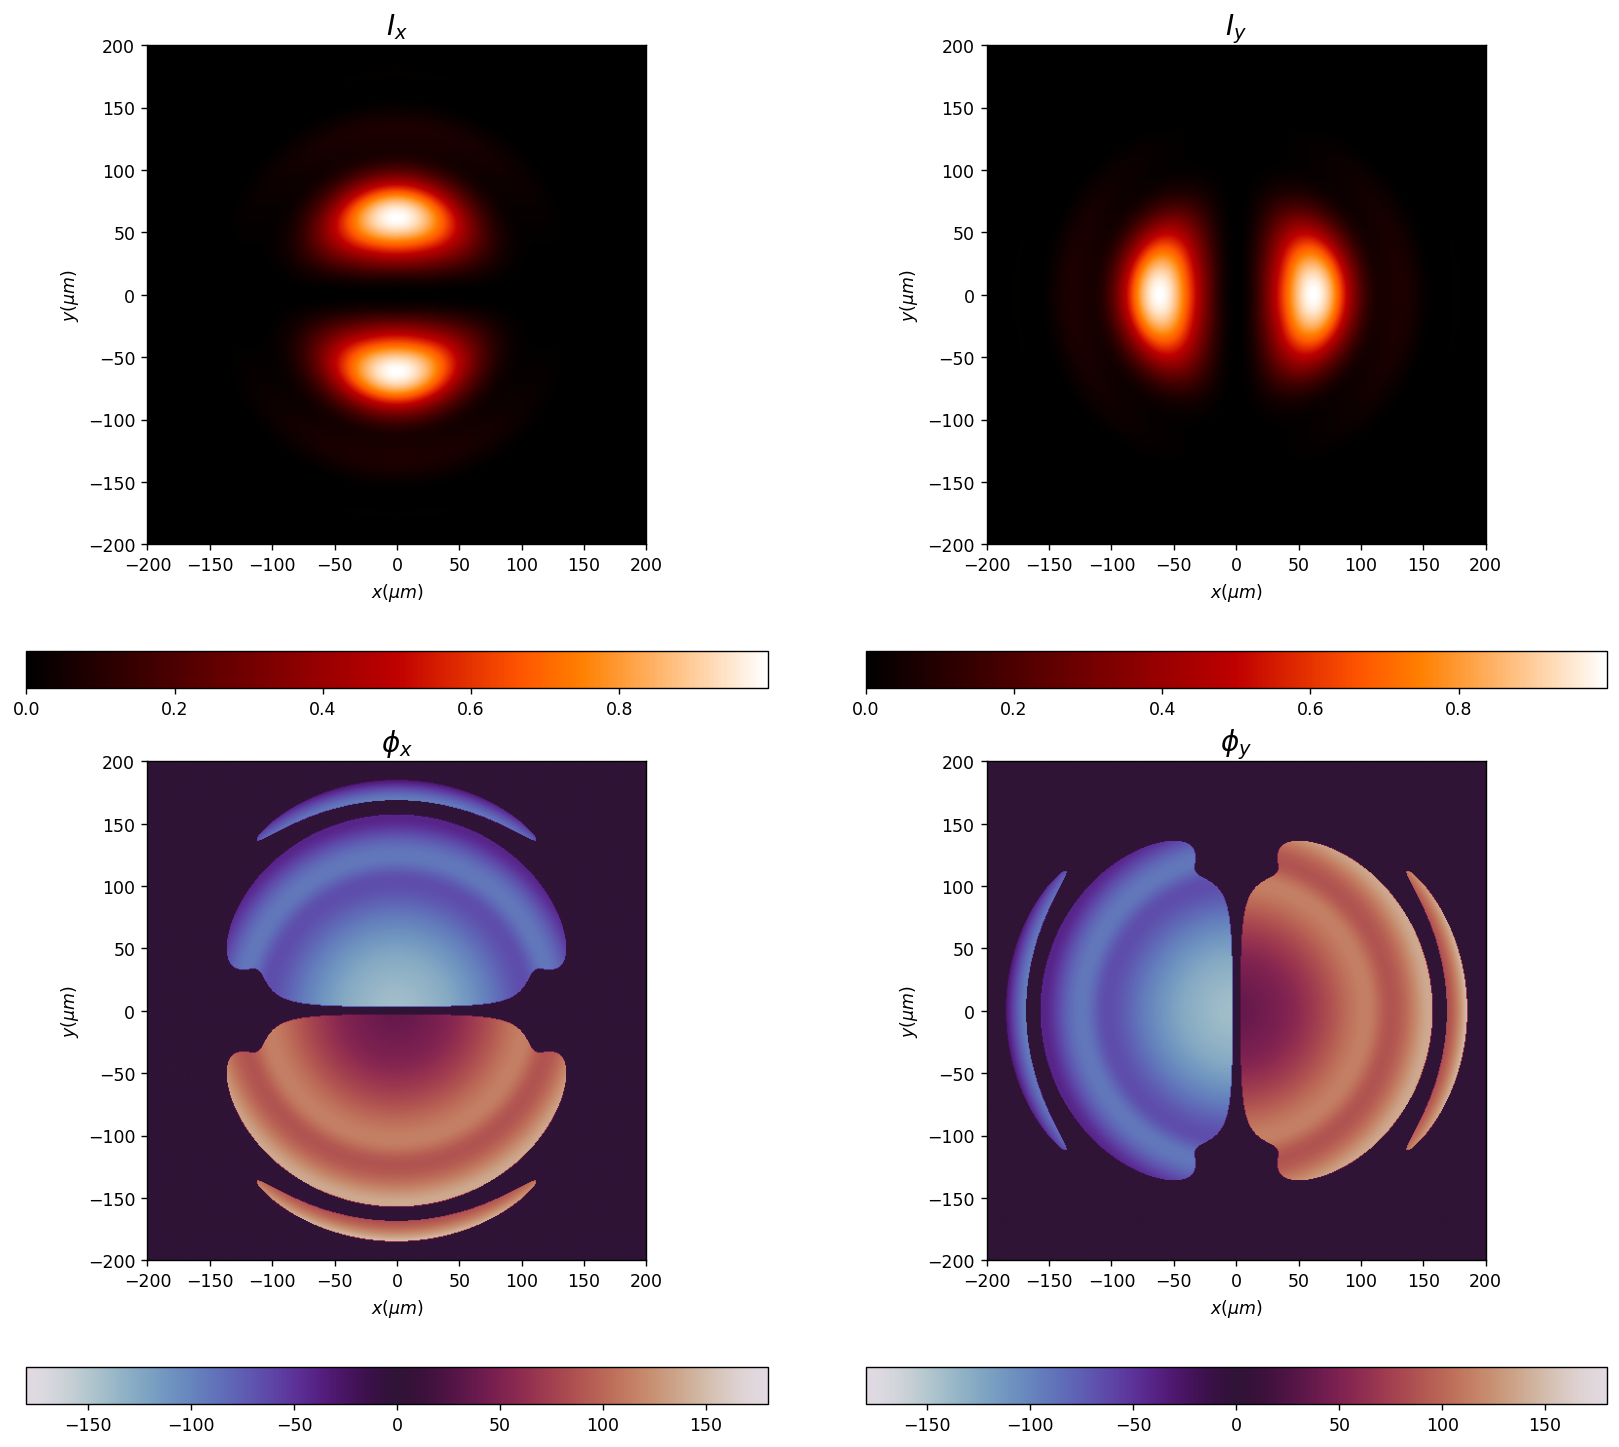

In [46]:
#EM.__draw_field__();
EM.draw(kind='fields');

## Draw Stokes

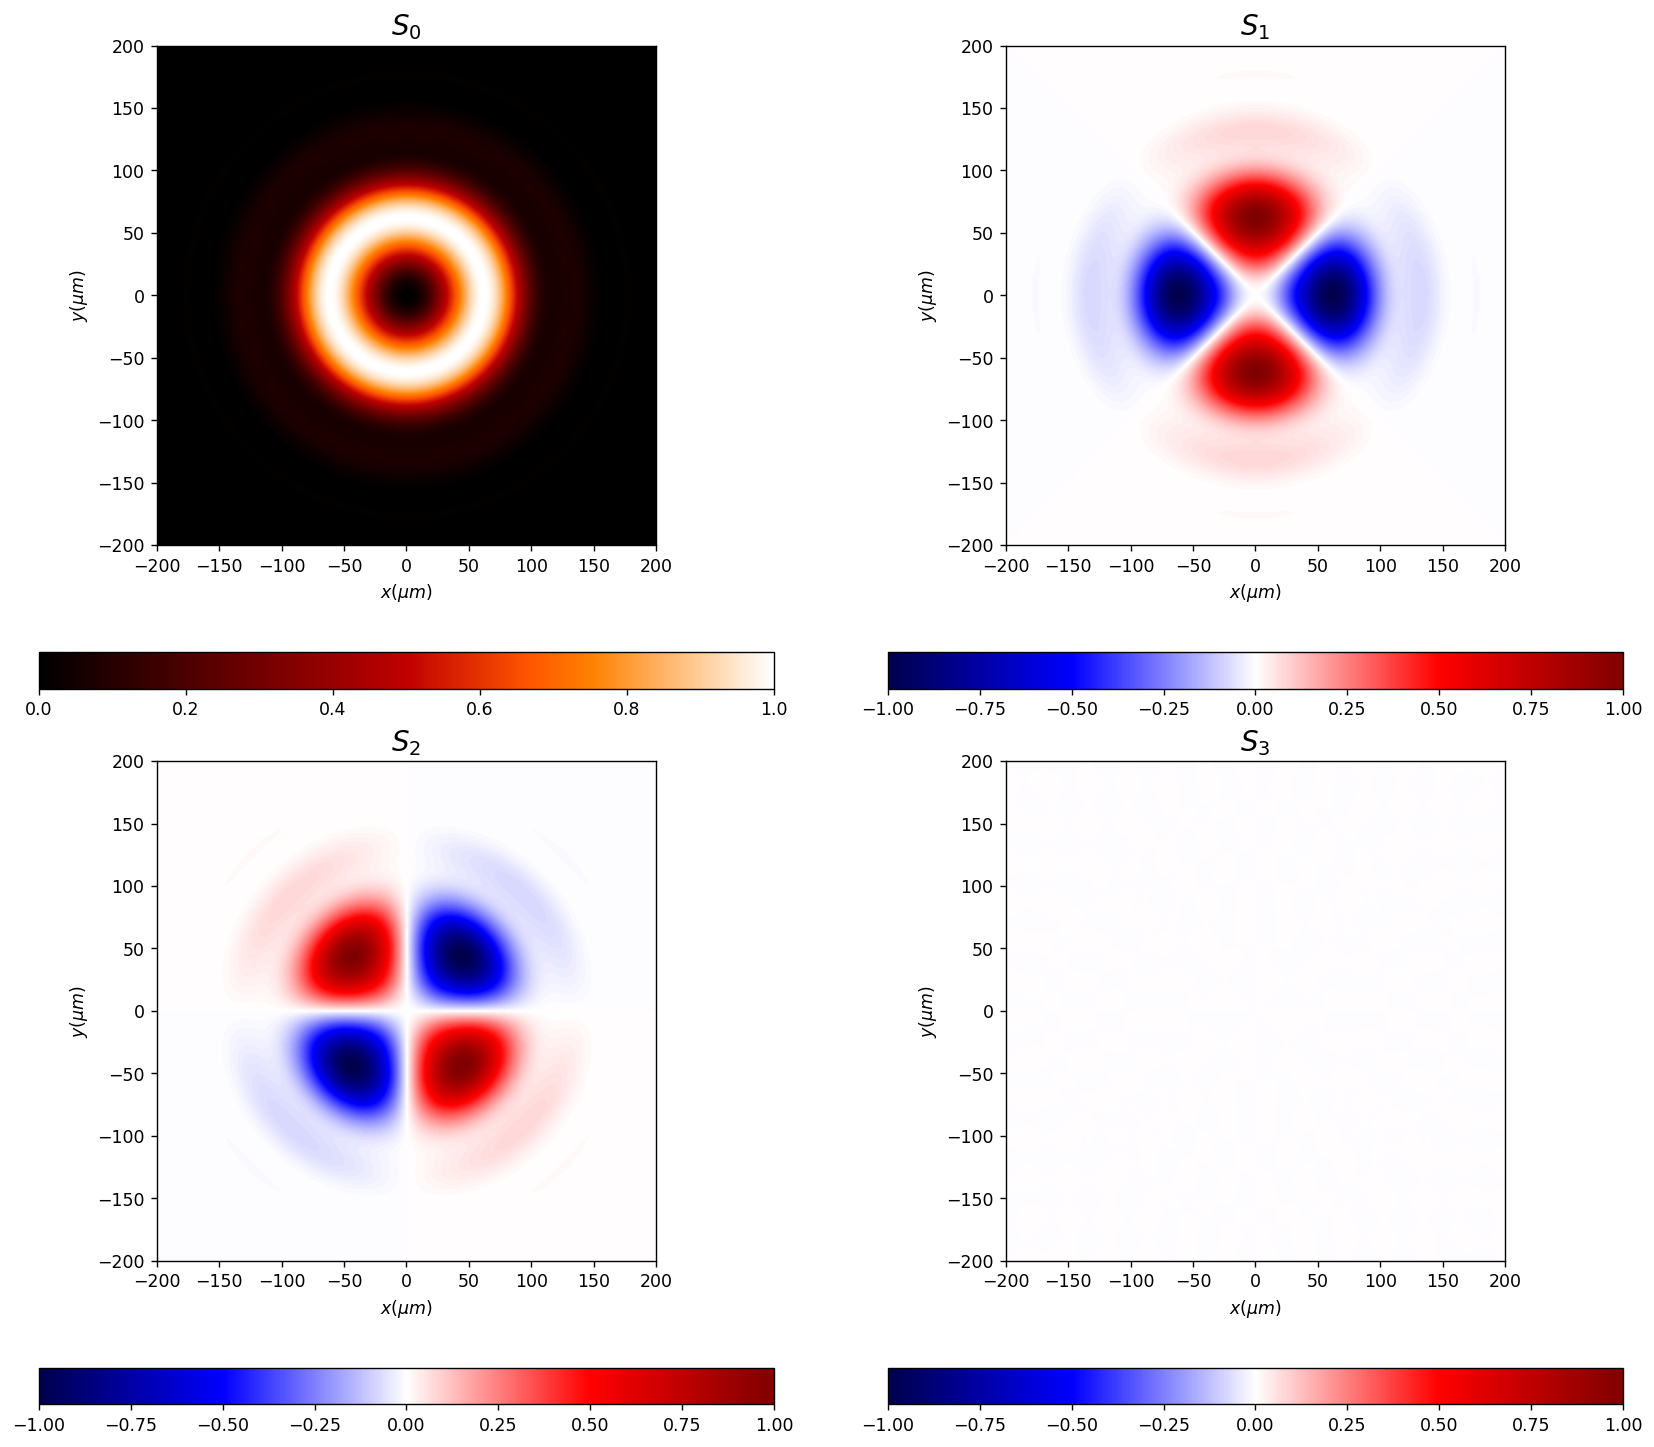

In [47]:
EM.draw(kind='stokes');

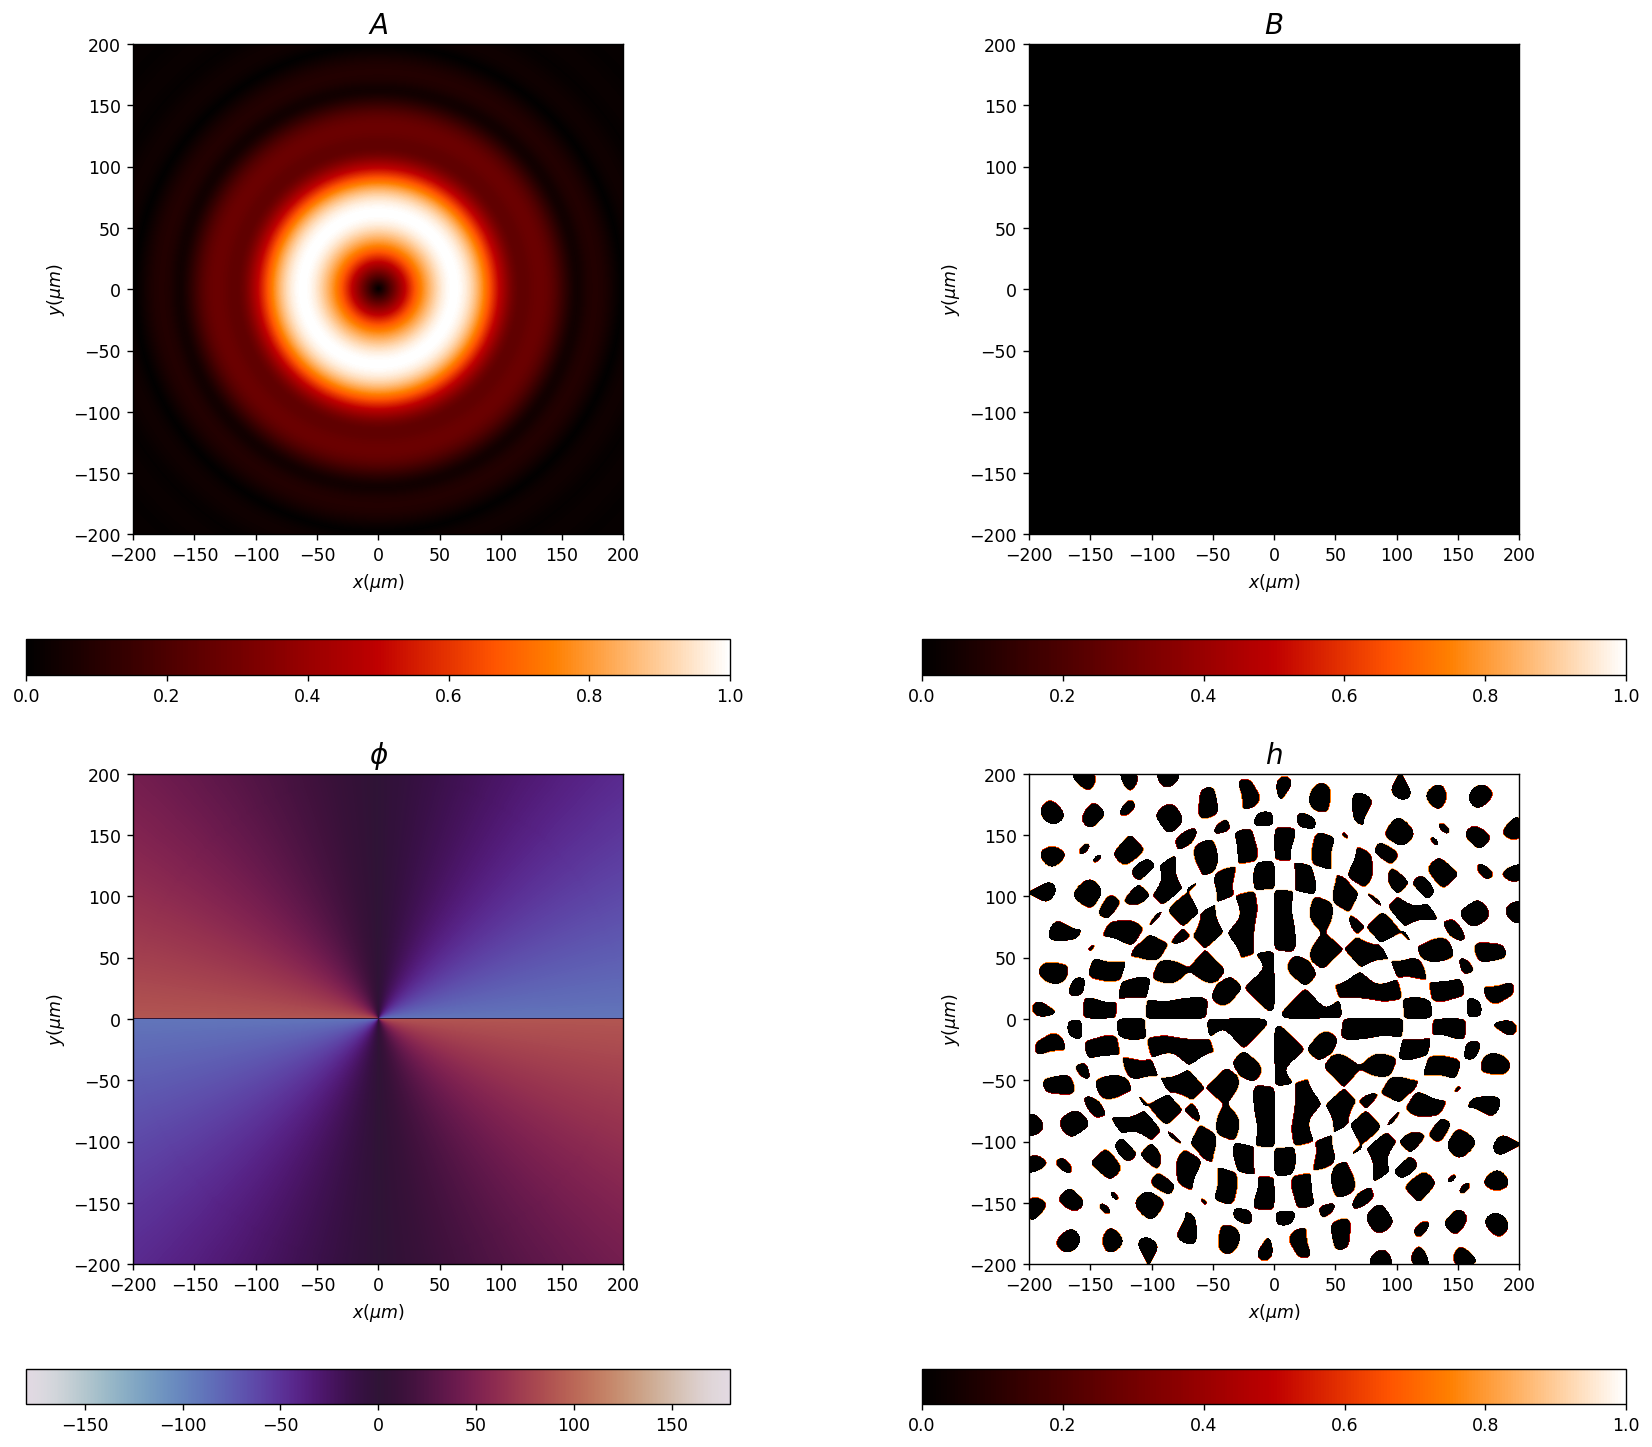

In [48]:
#EM.__draw_param_ellipse__();
EM.draw(kind='param_ellipse');

## Polarizations ellipses

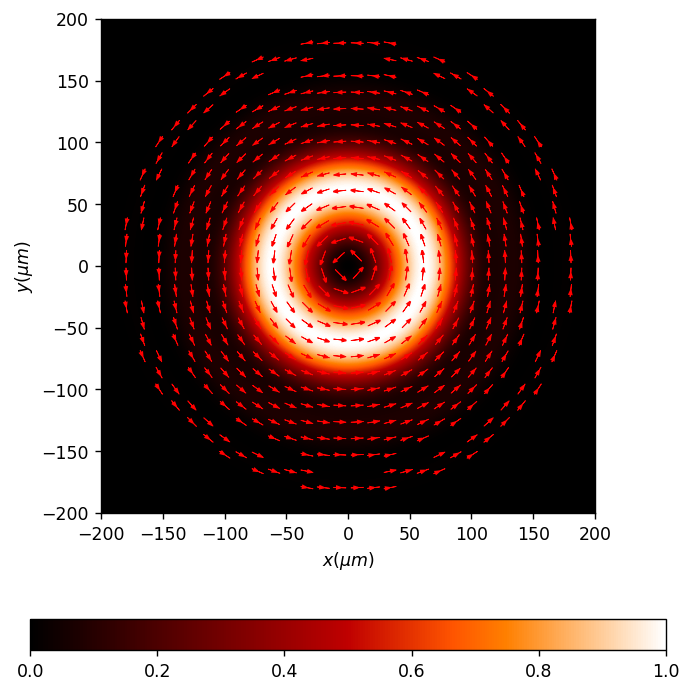

In [49]:
EM.__draw_ellipses__(
    logarithm=False,
    normalize=False,
    cut_value=False,
    num_ellipses=(30, 30),
    amplification=0.75,
    color_line='r',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=False)

This polarizaation ellipses can also be drawn at any other drawing, provided that we have the axis associated to this drawing

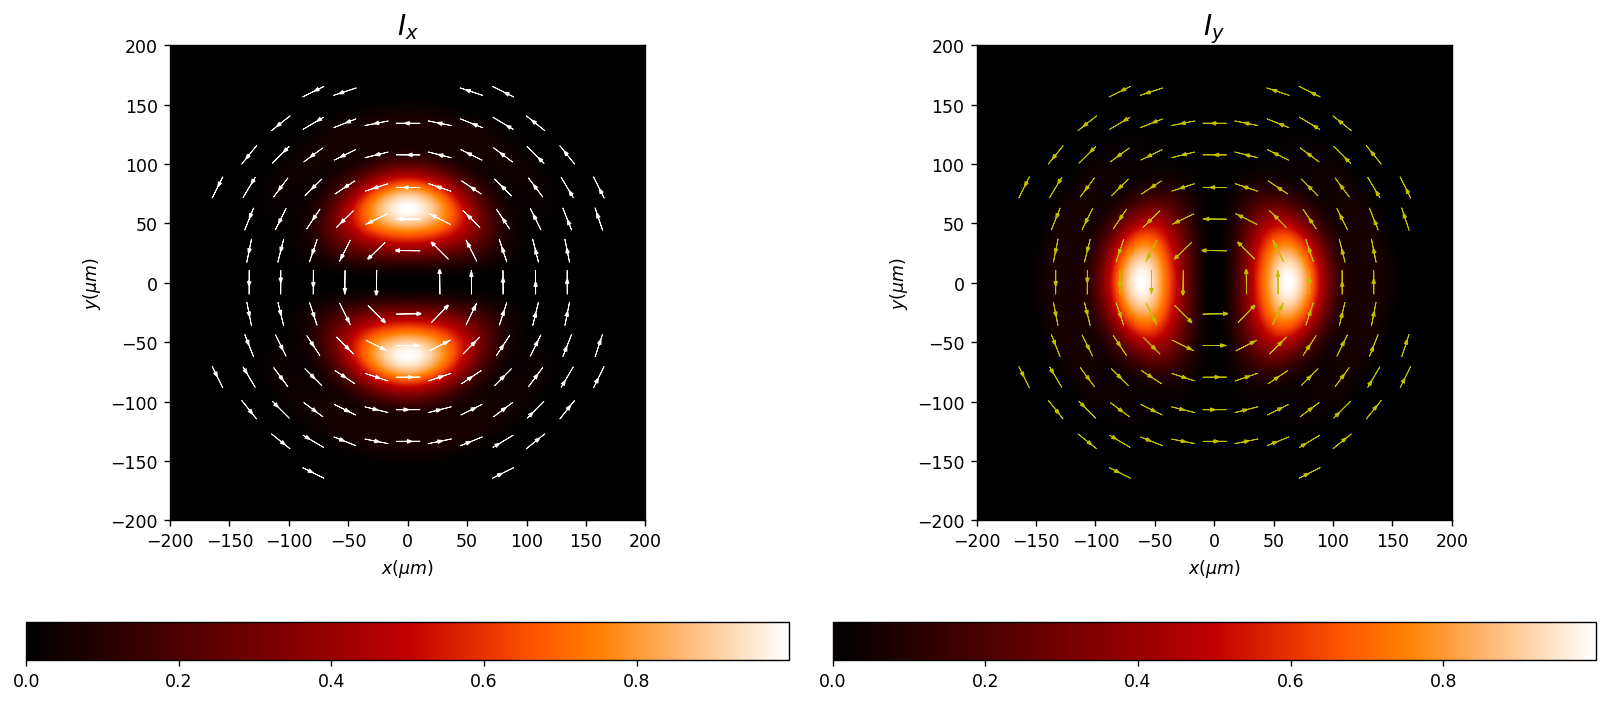

In [50]:
h1,h2=EM.draw(kind='intensities')
EM.__draw_ellipses__(
    logarithm=False,
    normalize=False,
    cut_value=False,
    num_ellipses=(15, 15),
    amplification=0.75,
    color_line='w',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=h1)

EM.__draw_ellipses__(
    logarithm=False,
    normalize=False,
    cut_value=False,
    num_ellipses=(15, 15),
    amplification=0.75,
    color_line='y',
    line_width=.5,
    draw_arrow=True,
    head_width=2,
    ax=h2)
plt.tight_layout()

## Other way

In [51]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)

wavelength = 0.6328 * um

Scalar source

In [52]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

Vector source

In [53]:
EM = Vector_source_XY(x0, y0, wavelength)
EM.radial_wave(u=u0, r0=(0,0), radius=(200,200))

If we need, we can convert the $E_x$ and $E_y$ fields in Scalar_field_XY.

In [54]:
Ex,Ey,_=EM.get()
print(Ex)

[[0.-0.j 0.-0.j 0.-0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.-0.j 0.-0.j 0.-0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.-0.j 0.-0.j 0.-0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.-0.j 0.-0.j 0.-0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.-0.j 0.-0.j 0.-0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.-0.j 0.-0.j 0.-0.j ... 0.+0.j 0.+0.j 0.+0.j]]


We can obtain a variety of representation, simply using the draw method.

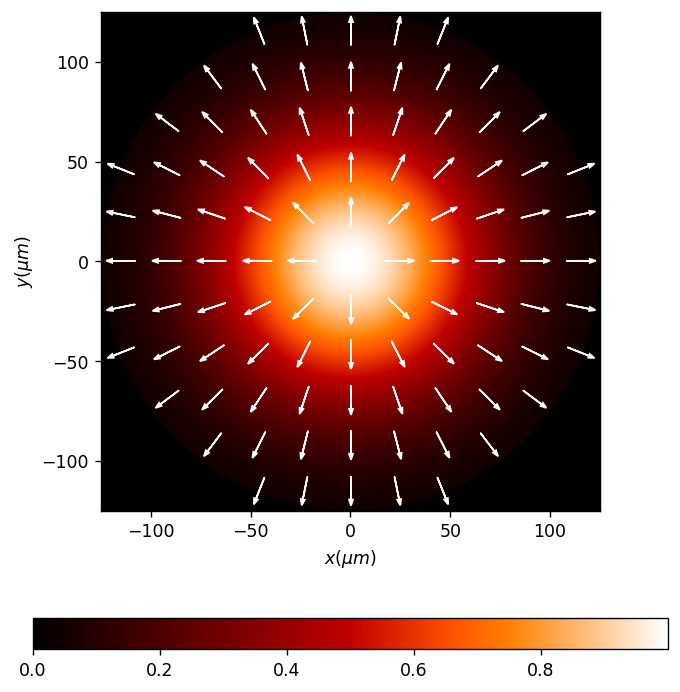

In [55]:
EM.draw(kind='ellipses')

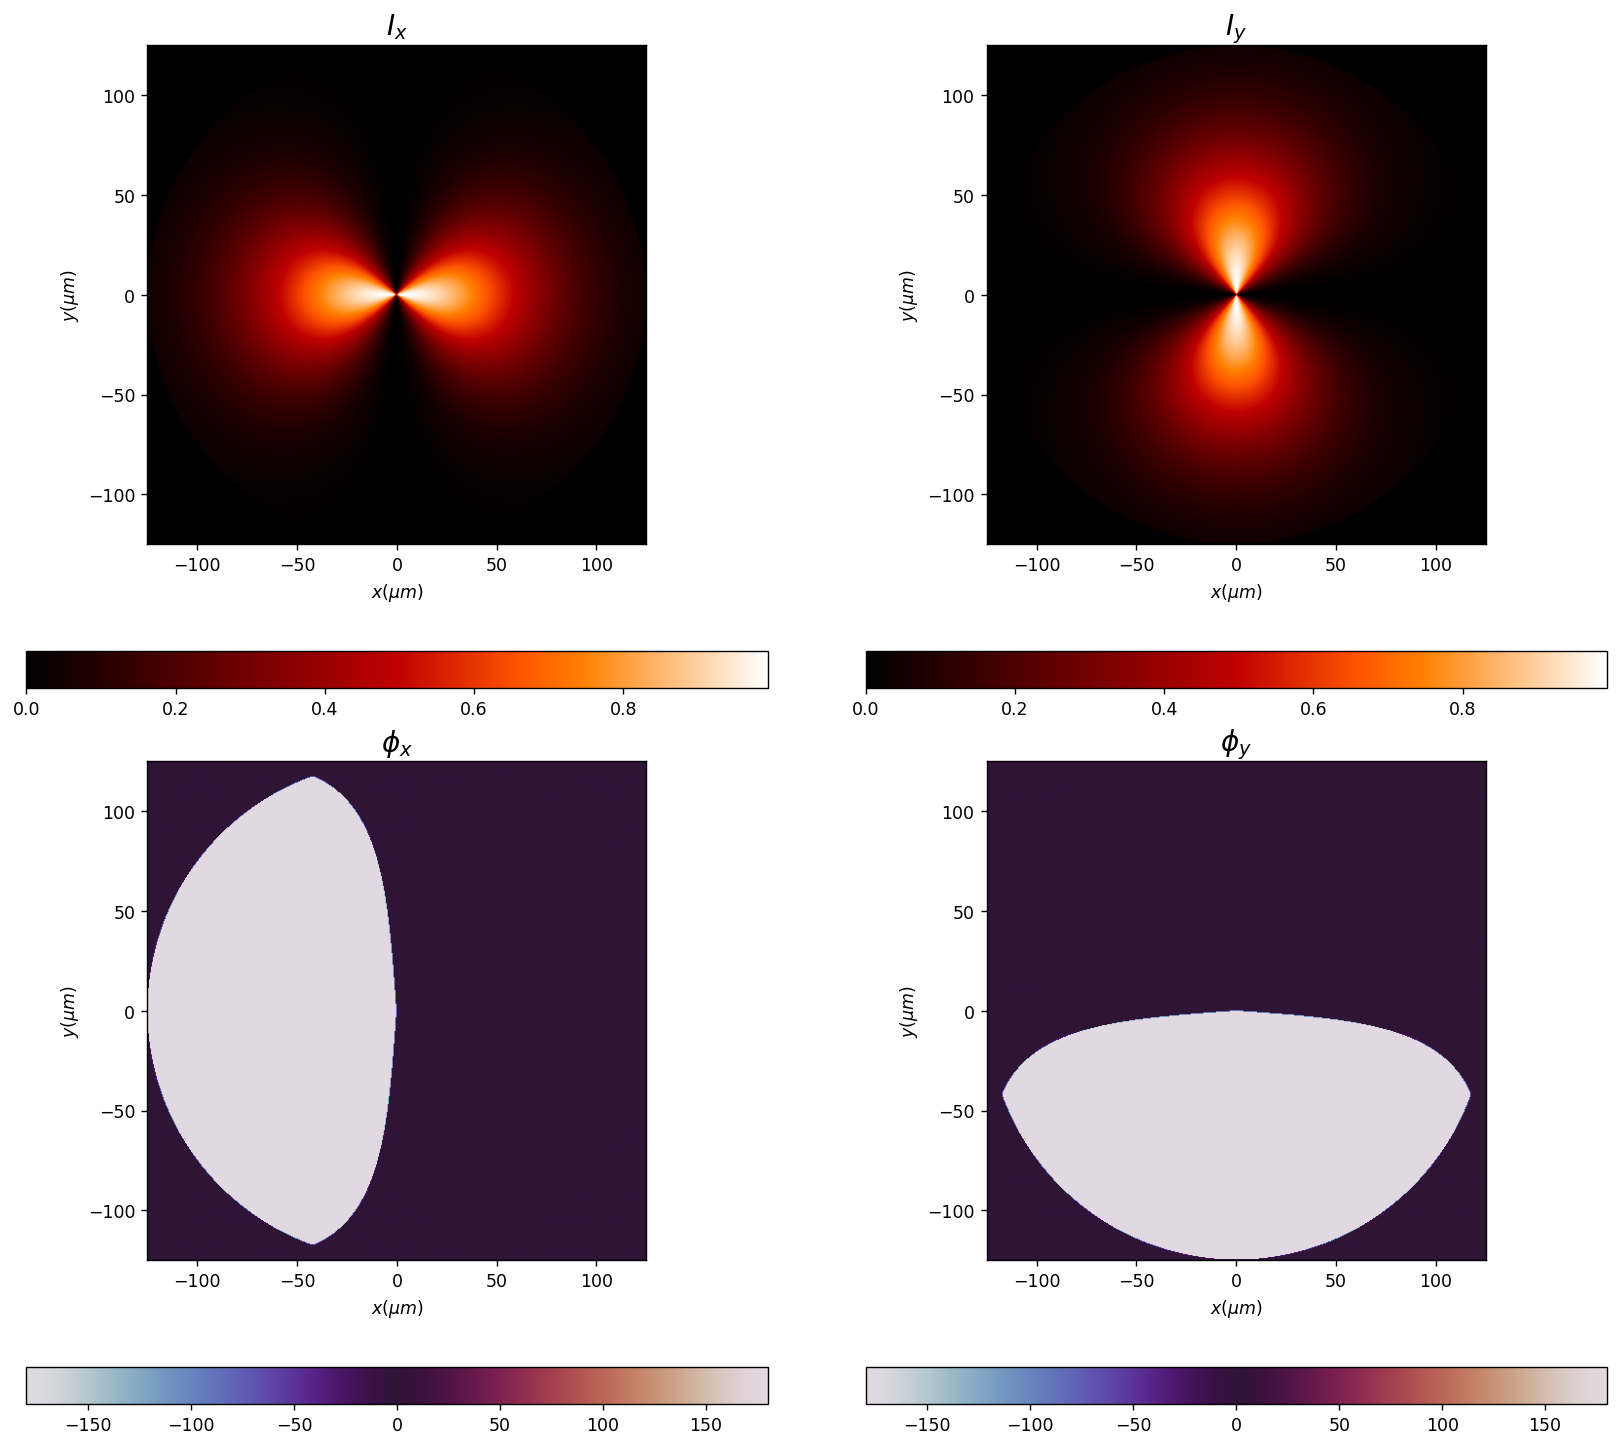

In [56]:
EM.draw(kind='fields');

Polarimetric representation can be performed in a simple way.

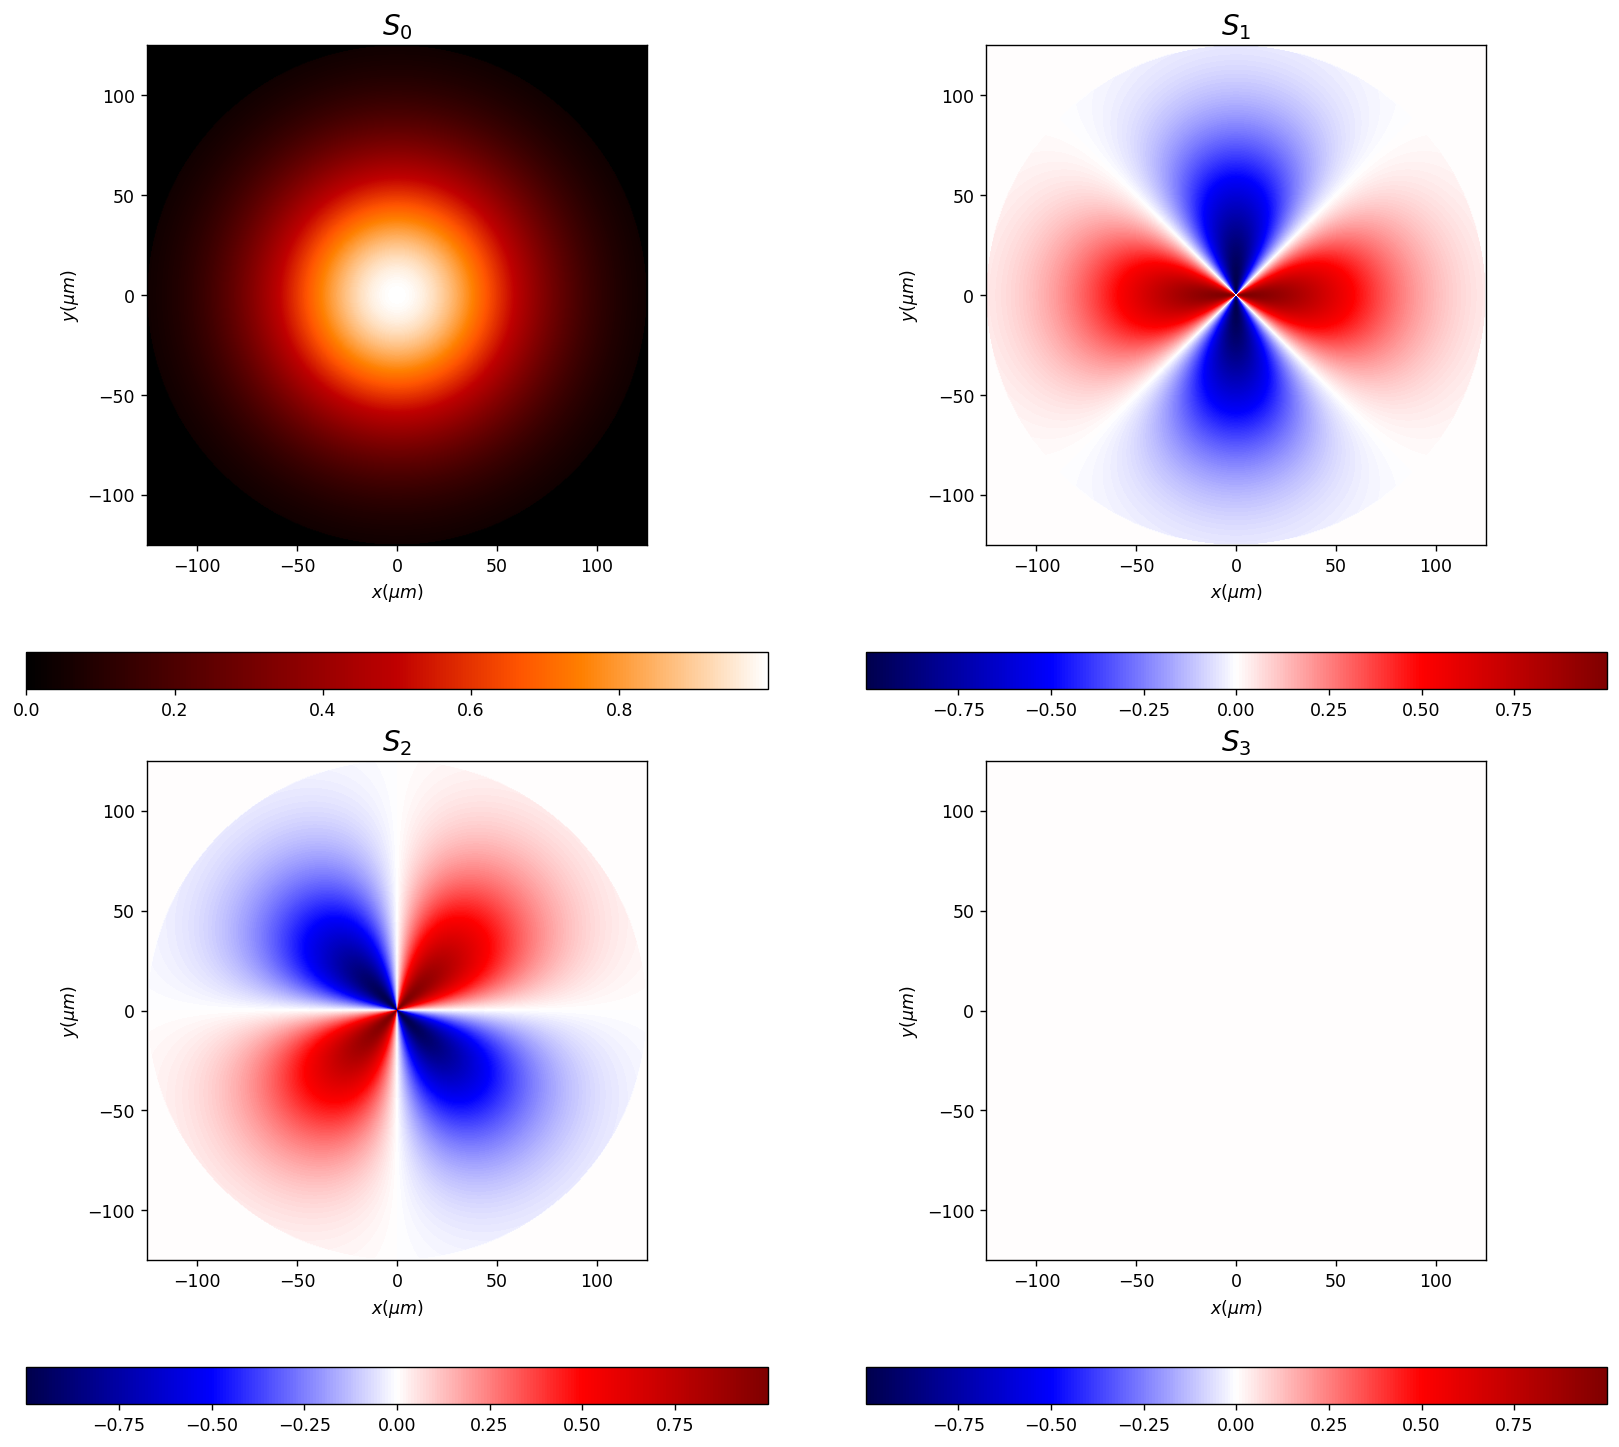

In [57]:
EM.draw('stokes');

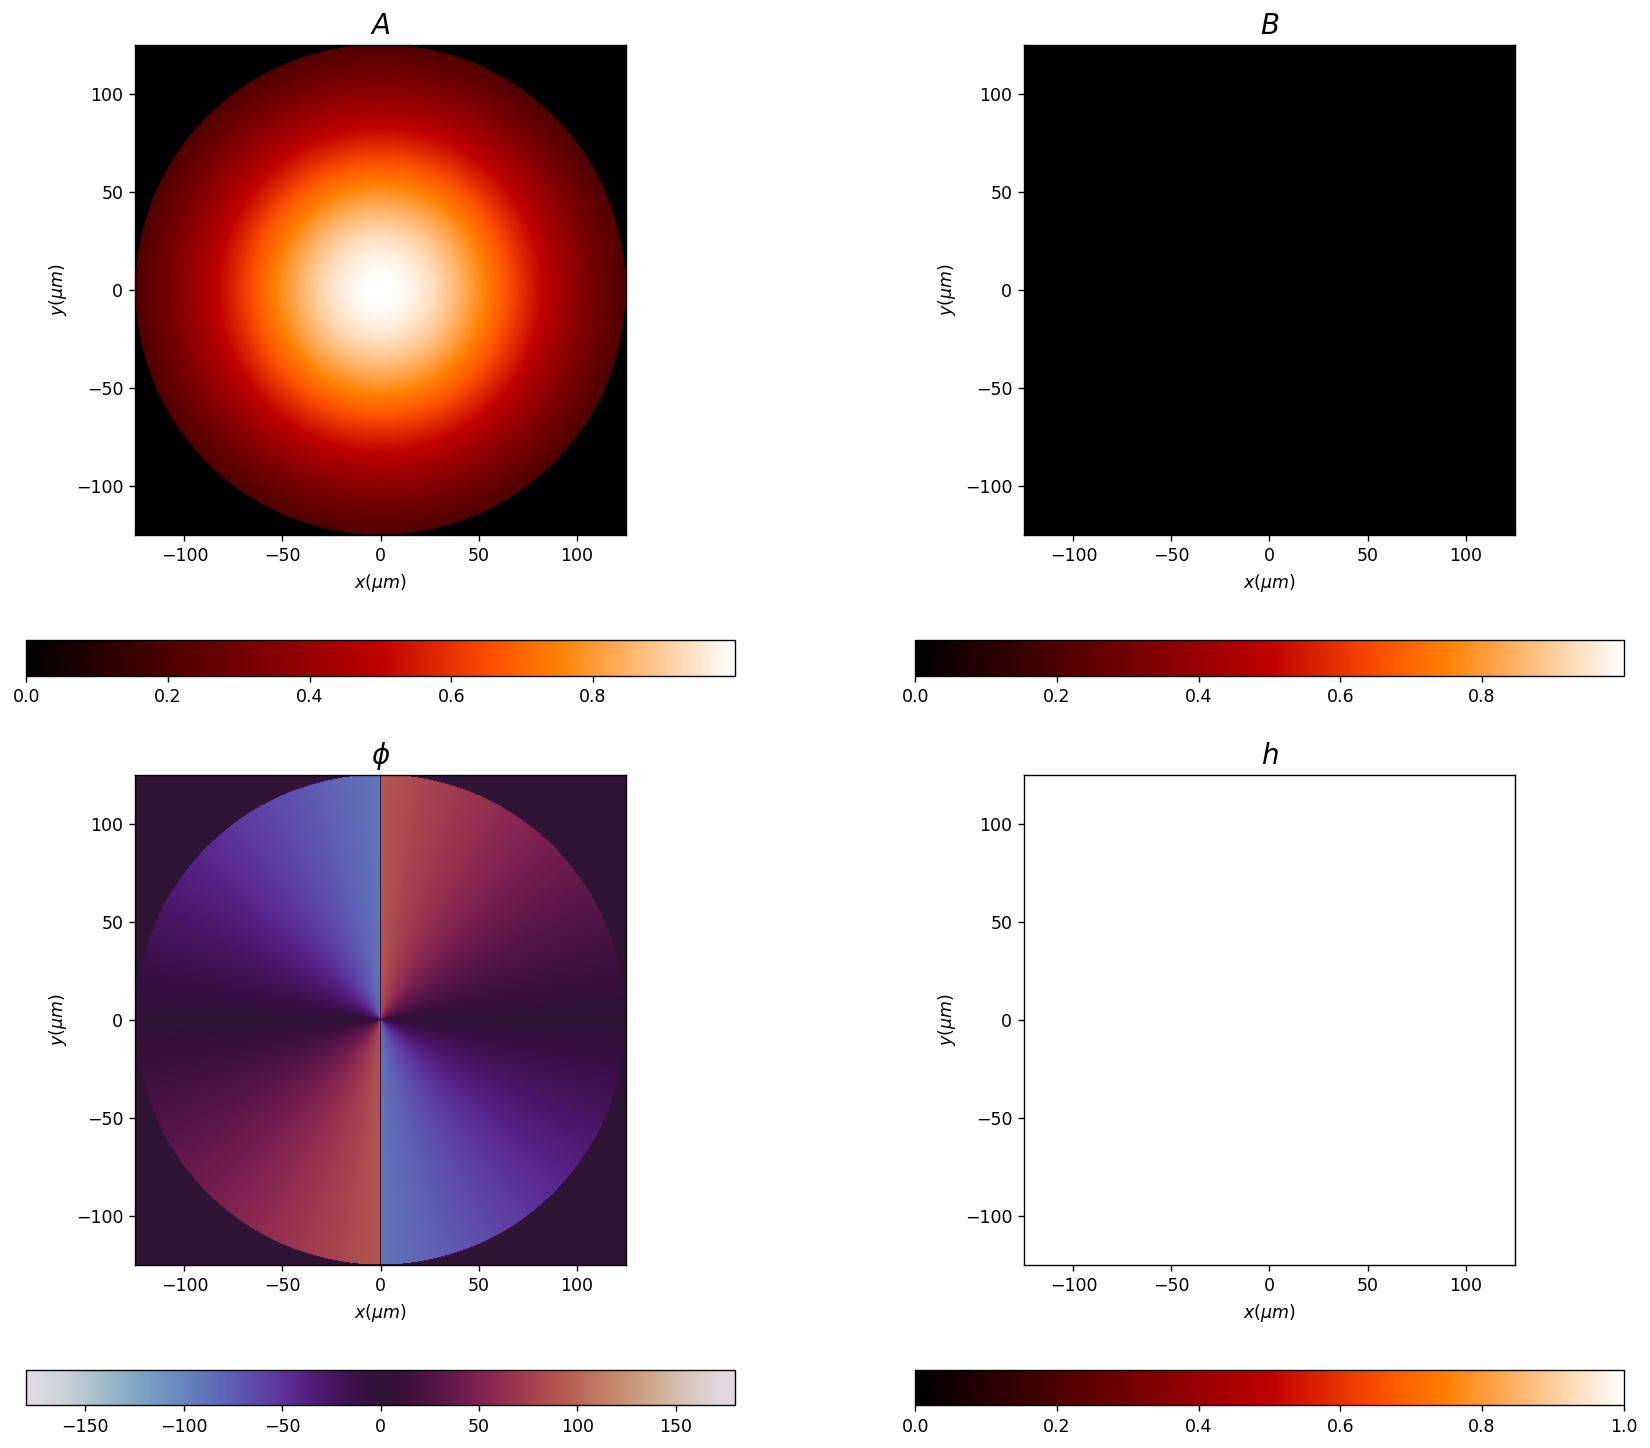

In [58]:
EM.draw('param_ellipse');